# Notebook 3 - Regresión Polinomial

## 1. Abrimos el dataset.

Hoy, a diferencia de los días anteriores, vamos a cargar nuestros datos desde un archivo subido desde el ordenador, que será la manera más habitual de hacerlo en nuestro día a día. Para eso tendremos que desplegar el menú de la izquierda del Google Colab y en la pestaña *Archivos* clickar en el botón *Subir* para cargar archivos desde tu ordenador. Los archivos cargados tendrán que ser resubidos tras 24 horas, cuando Google nos reinicie la máquina virtual que soporta este Notebook.

Cargaremos el fichero [*insurance.csv*](https://drive.google.com/open?id=1aLNx3nRufOS8o7Gi321kHulBEbHGYMLk). Este archivo presenta un serie temporal que supondremos haber exportado de una de las tablas de la base de datos de nuestra empresa, donde sólo tendremos dos variables: ***Year***, el año al que hace referencia la variable y ***Av_claims***, la media de partes mensuales.




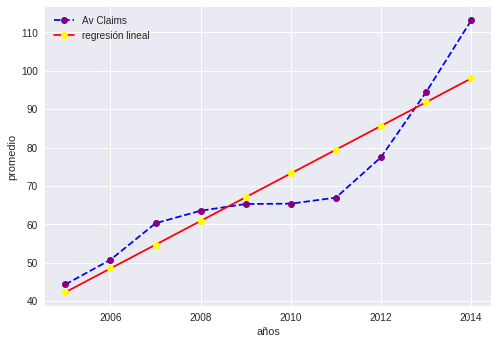

Los pesos de la línea son w0 11.35739393939393 ,  w1 6.188484848484848


In [7]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy   import genfromtxt

csv = np.genfromtxt('insurance.csv', skip_header = 1, delimiter=',')

X = csv.T[0].reshape(len(csv),1)
Y = csv.T[1].reshape(len(csv),1)

rgs = linear_model.LinearRegression()
rgs.fit(X, Y)

plt.plot(X + 2000, Y, linestyle='--', marker='o', markerfacecolor='purple', color='blue', label='Av Claims')
plt.xlabel("años")
plt.ylabel("promedio")
plt.plot(X+2000, rgs.predict(X), color='red', markerfacecolor='yellow', label='regresión lineal', marker='o')
plt.legend()
plt.show()

w0 = rgs.predict([[0]])[0,0]
w1 = rgs.predict([[1]])[0,0] - w0

print('Los pesos de la línea son','w0', w0, ',  w1', w1)

ecm = mean_squared_error(Y, rgs.predict(X))


La regresión lineal tiene una propiedad y es que se puede encontrar la configuración de coeficientes con minimo error instantaneamente ![error](http://www.basised.com/flagstaff/files/2018/04/perceptron_gradient_descent_1.png)

En las siguientes gráficas variaremos los coeficientes para ver las diferentes configuraciones que generarían.

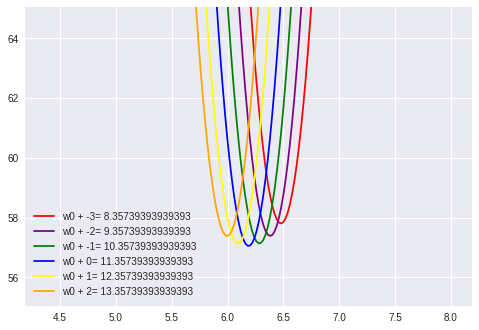

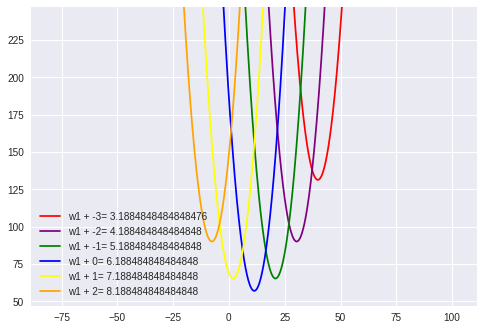

In [10]:
from sklearn.metrics import mean_squared_error

colors = ['red', 'purple', 'green', 'blue', 'yellow', 'orange']


for i in range(6):
  lns = np.linspace(w1 -10.0, w1 + 10.0, 1000)
  offsetX = 1
  
  subW0 = w0 + (i - 3) * offsetX 
  errors = [mean_squared_error(Y, X*w + subW0) for w in lns]
  plt.plot(lns, errors, color=colors[i], label='w0 + ' + str( + (i - 3) * offsetX ) + '= ' + str(subW0))
  plt.legend()
  plt.ylim(ecm - 2, ecm + 8)
  plt.xlim(w1 - 2, w1 + 2)

plt.show()

for i in range(6):
  lns = np.linspace(w0 -100.0, w0 + 100.0, 1000)
  offsetX = 1
  
  subW1 = w1 + (i - 3) * offsetX 
  errors = [mean_squared_error(Y, X*subW1 + w) for w in lns]
  plt.plot(lns, errors, color=colors[i], label='w1 + ' + str( + (i - 3) * offsetX ) + '= ' + str(subW1))
  plt.legend()
  plt.ylim(ecm - 10, ecm + 190)
  plt.xlim(w0 - 100, w0 + 100)

plt.show()


En 3D es dificil visuallizar pues los coeficientes generan parabolas de diferentes 'aperturas'

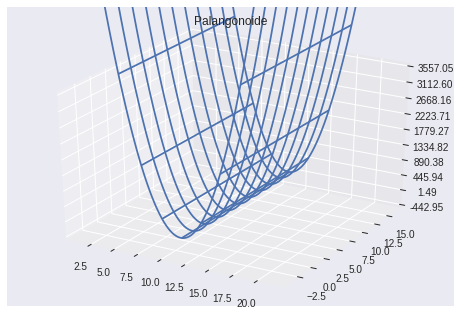

In [11]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm


def show_3d_graph():
  w1_offset = 10
  w0_offset = 10
  ecm_offset = 2000
  
  lns_w1 = np.linspace(w1 -w1_offset, w1 + w1_offset, 100)
  lns_w0 = np.linspace(w0 -w0_offset, w0 + w0_offset, 100)

  w0_X, w1_Y = np.meshgrid(lns_w0, lns_w1)
  Z_ = np.matrix([mean_squared_error(Y, X*w1_ + w0_) for (w0_, w1_) in zip(lns_w0, lns_w1)] )

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  

  
  ax.plot_wireframe(w0_X, w1_Y, Z_, rstride=10, cstride=10)

  ax.set_zlim(ecm - ecm_offset * 0.25 , ecm + ecm_offset * 1.75)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


  plt.title("Palangonoide",  loc='center')
  plt.show()
  
  
show_3d_graph()

## 2. Regresión polinomial.

Parece que el modelo de Regresión Lineal Simple, tal cuál lo hemos planteado, no consigue capturar por completo la relación entre ambas variables. Por suerte, ya sabemos que podemos añadir una mayor flexibilidad al modelo haciendo uso de la magia de los polinomios! 

---

**Tarea:**

1. Implementa una función que tome como parámetro de entrada la matriz $X$ y un número entero que represente el **grado** del polinomio. La tarea de dicha función será la de crear una matriz de salida, cuyas columnas sean cada una de las columnas de la matriz original, elevadas a todas las potencias existentes entre 0 y el número especificado por el parámetro **grado**. Por ejemplo, si la matriz de entrada es la siguiente:

> > > > > > $
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{12}\\
   x_{21} & x_{22}\\
  \end{array} } \right]
$

y el grado especificado es 3, entonces la matriz generada será:

> > > > > > $
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

2. Una vez tengas esta función implementada, utilizala para procesar la matriz $X$ con los siguientes grados $g = [1, 2, 3, 4, 5, 6]$, y ajusta el modelo para cada una de estas matrices. Conjuntamente grafica cada una de las lineas de regresión obtenidas, así como calcula el ***Error Cuadrático Medio*** para estos modelos. Para realizar estas gráficas, investiga la función **matplotlib.pyplot.subplots** para distribuir todas las gráficas en tres filas con dos gráficas en cada una.

ECM de 1 grados = 57.04720206060608
ECM de 2 grados = 31.607381984848463
ECM de 3 grados = 2.9356406969696685
ECM de 4 grados = 2.8754511829836256
ECM de 5 grados = 0.23210655478033967
ECM de 6 grados = 0.2180263187957193


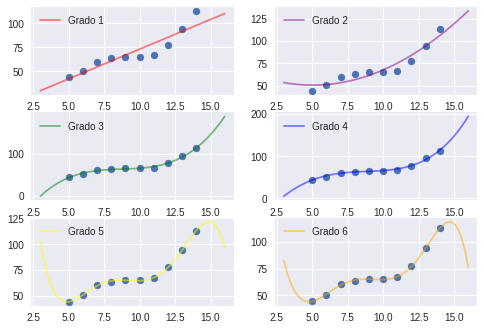

In [0]:
def powerize(X, degree):
  cols = np.ones((len(X),1))
  for i in range(1, degree + 1):
    cols = np.hstack((cols, np.power(X, i)))
  return cols
  
  
XPower = [powerize(X, i) for i in [1,2,3,4,5,6]]


for subX in XPower:
  
  W = np.linalg.inv(subX.T @ subX) @ subX.T @ Y
  degree = len(W) - 1
  
  lns = np.linspace(np.min(X) - 2, np.max(X) + 2, 100).reshape(100,1)
  
  def predict (w, y):
    result = 0
    for n in range(len(w)):
      result += w[n] * (y ** n)
      
    return result
  
  plt.subplot(3, 2, degree)
  plt.scatter(X, Y)
  plt.plot(lns, predict(W, lns), alpha=0.5, label="Grado " + str(degree), color=colors[degree-1] )
  print("ECM de", degree, "grados =",  mean_squared_error(Y, predict(W, X))  )
  
  plt.legend()
  
  

plt.show()
  
  



## 3. Regresión Polinomial - Sklearn.

---
**Tarea** : Como ya va siendo costumbre en estos ejercicios y también en casos reales, la primera vez implementamos, pero ya a la segunda: reutilizamos. Vamos a repetir el mismo análisis de **Regresión Polinomial** que hemos realizado en el ejercicio anterior, pero en esta ocasión haciendo uso de la función ***sklearn.preprocessing.PolynomialFeatures()*** de la librería ***Sklearn***. Recuerda que en este caso Sklearn transforma tu matriz $X$ para añadir coeficientes polinomiales **y también sus interacciones**, cosa que no hemos incluido en el ejercicio anterior. Por esto mismo, es de esperar que los resultados no sean iguales (por ejemplo el*** Error Cuadrático Medio***), pero no te preocupes, la calidad del análisis debe ser igual o mejor. Visualiza los modelos entrenados para cada grado de la misma forma que hicimos en el ejercicio previo (reutiliza el código).


ECM de 1 grados = 57.04720206060606
ECM de 2 grados = 31.607381984848466
ECM de 3 grados = 2.9356406969695703
ECM de 4 grados = 2.875451182983741
ECM de 5 grados = 0.2321065547789455
ECM de 6 grados = 0.21802631235443098


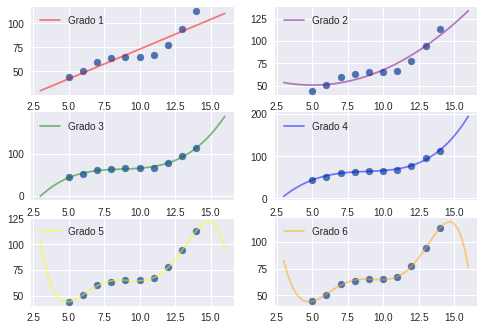

In [0]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

for degree in range(1, 7):
  poly = PolynomialFeatures(degree=degree, interaction_only=False)

  X_ = poly.fit_transform(X)

  lg = linear_model.LinearRegression()
  lg.fit(X_, Y)

  lns = np.linspace(np.min(X) - 2, np.max(X) + 2, 100).reshape(100,1)
  X_for_test = poly.fit_transform(lns)
  
  plt.subplot(3, 2, degree)
  plt.scatter(X, Y)
  plt.plot(lns, lg.predict(X_for_test), alpha=0.5, label="Grado " + str(degree), color=colors[degree-1] )
  print("ECM de", degree, "grados =",  mean_squared_error(Y, lg.predict(X_))  )
  
  plt.legend()
  
plt.show()